In [1]:
pip install panda

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
python -m pip install --upgrade pip

SyntaxError: invalid syntax (<ipython-input-2-0a8cf7b99133>, line 1)

In [4]:
import pandas as pd
import numpy as np

In [7]:
s=pd.Series([1,2,3,4,5,6,np.nan,8,9,10])

In [8]:
s

0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     NaN
7     8.0
8     9.0
9    10.0
dtype: float64

In [9]:
p=pd.date_range('20200301',periods=10)

In [10]:
p

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df=pd.DataFrame(np.random.randn(10,4),index=p,columns=['A','B','C','D'])

In [14]:
df

,A,B,C,D
2020-03-01,1.727764,0.221544,-0.444690,1.119829
2020-03-02,-1.186829,0.261093,-1.429106,-0.053925
2020-03-03,-0.159791,1.846870,-0.539413,-0.160329
2020-03-04,-1.092567,-1.451879,-0.454757,0.089995
2020-03-05,-0.478092,0.005598,-1.379110,-0.917439
2020-03-06,-0.041693,-0.608029,0.559607,0.808491
2020-03-07,-0.915219,-0.115600,0.641876,0.175577
2020-03-08,0.957208,-1.697649,0.371370,-1.332936
2020-03-09,1.469162,-0.310982,-0.129214,0.070720
2020-03-10,0.864238,0.652709,-0.492773,0.328955


In [15]:
df=pd.DataFrame({'A':[1,2,3,4],
                  'B':pd.Timestamp('20200301'),
                  'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                  'D':np.array([5]*4,dtype='int32'),
                  'E':pd.Categorical(['true','false',"True","False"]),
                  'F':'Edureka',
                })

In [16]:
df

,A,B,C,D,E,F
0,1,2020-03-01,1.0,5,true,Edureka
1,2,2020-03-01,1.0,5,false,Edureka
2,3,2020-03-01,1.0,5,True,Edureka
3,4,2020-03-01,1.0,5,False,Edureka


In [17]:
df.dtypes

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset= pd.read_csv('D:\project\Machine Learning A-Z Template Folder\Part 1 - Data Preprocessing\Section 2 --------------- Part 1 - Data Preprocessing -----------------\Data.csv')
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [6]:
X.values

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3]=imputer.transform(X[:, 1:3])

In [11]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [12]:
#Transforming independent variable into numeric value
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [13]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [14]:
#Transforming dependent variable into numerical value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(Y)

In [15]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [17]:
#Splitting test and data set into two parts
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state = 1)

In [21]:
Y_train

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes'], dtype=object)

In [22]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train[:,3:]=sc.fit_transform(X_train[:,3:])
X_test[:,3:]=sc.fit_transform(X_test[:,3:])

In [24]:
X_test

array([[0.0, 1.0, 0.0, -1.0, -1.0],
       [1.0, 0.0, 0.0, 1.0, 1.0]], dtype=object)

In [1]:
#Simple Linear Regression
#Importing Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset= pd.read_csv('D:\project\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 4 - Simple Linear Regression\Salary_Data.csv')
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [16]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = regressor.predict(X_test)

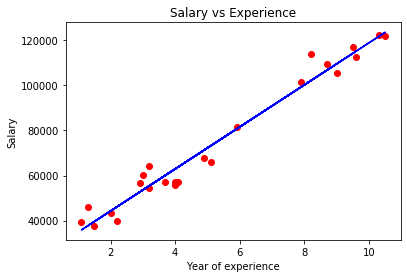

In [19]:
plt.scatter(X_train,Y_train,color = 'red' )
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title("Salary vs Experience")
plt.xlabel("Year of experience")
plt.ylabel("Salary")
plt.show()

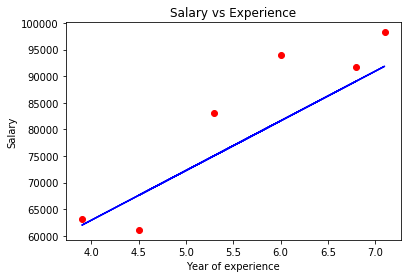

In [23]:
plt.scatter(X_test,Y_test,color = 'red' )
plt.plot(X_test,y_pred,color='blue')
plt.title("Salary vs Experience")
plt.xlabel("Year of experience")
plt.ylabel("Salary")
plt.show()

In [24]:
print(regressor.predict([[12]]))

[137605.23485427]


In [25]:
print(regressor.coef_)
print(regressor.intercept_)

[9332.94473799]
25609.89799835482


In [1]:
#Multilinear Regression
#Importing Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
dataset=pd.read_csv('D:\project\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 5 - Multiple Linear Regression\Startups.csv')
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
Y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),axis=1))

[[114664.42 105008.31]
 [ 90593.16  96479.51]
 [ 75692.84  78239.91]
 [ 70221.89  81229.06]
 [179790.26 191050.39]
 [171576.92 182901.99]
 [ 49753.59  35673.41]
 [102276.66 101004.64]
 [ 58649.38  49490.75]
 [ 98272.03  97483.56]]


In [29]:
Y_pred

array([114664.41715867,  90593.1553162 ,  75692.84151574,  70221.88679651,
       179790.25514874, 171576.92018521,  49753.58752029, 102276.65888936,
        58649.37795761,  98272.02561131])

In [30]:
Y_test

array([105008.31,  96479.51,  78239.91,  81229.06, 191050.39, 182901.99,
        35673.41, 101004.64,  49490.75,  97483.56])

In [3]:
#Polynomial Linear regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset=pd.read_csv('D:\project\Machine Learning\Machine Learning A-Z (Codes and Datasets)\Part 2 - Regression\Section 6 - Polynomial Regression\Python\Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
Y=dataset.iloc[:,-1].values

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
from sklearn.preprocessing  import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

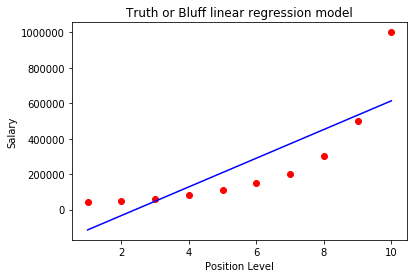

In [10]:
#Visualize the linear regression code
plt.scatter(X,Y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Truth or Bluff linear regression model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

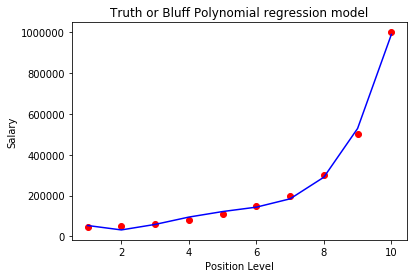

In [16]:
#Visualize the Polynomial regression code
plt.scatter(X,Y,color='red')
plt.plot(X,lin_reg2.predict(X_poly),color='blue')
plt.title('Truth or Bluff Polynomial regression model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [17]:
lin_reg.predict([[6.5]])

array([330378.78787879])

In [19]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])

In [21]:
#Support Vector regression
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [25]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [26]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [28]:
df['target']=iris.target

In [29]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [30]:
df['Flower_names']=df.target.apply(lambda x:iris.target_names[x])

In [31]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [32]:
from matplotlib import pyplot as plt

In [33]:
%matplotlib inline

In [34]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [35]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


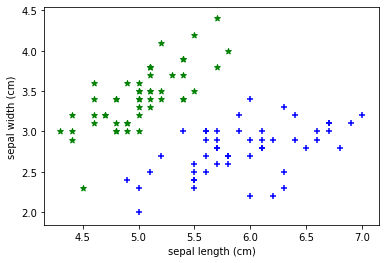

In [38]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='+')

In [39]:
from sklearn.model_selection import train_test_split

In [42]:
X=df.drop(['target','Flower_names'],axis='columns')

In [44]:
Y=df.target

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [54]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [60]:
from sklearn.svm import SVC
model=SVC(gamma='auto')

In [61]:
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
model.score(X_test,Y_test)

0.9666666666666667

In [1]:
# Support Vector Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
dataset=pd.read_csv('D:\project\Machine Learning\Machine Learning A-Z (Codes and Datasets)\Part 2 - Regression\Section 6 - Polynomial Regression\Python\Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
Y=dataset.iloc[:,-1].values

In [19]:
Y=Y.reshape(len(Y),1)

In [20]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(Y)

In [22]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [25]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [26]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,y)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
pred_value=regressor.predict(sc_X.transform([[6.5]]))
pred_value=sc_y.inverse_transform(pred_value)

In [31]:
pred_value

array([131106.77303274])

In [ ]:
#Visualize the Polynomial regression code
plt.scatter(X,Y,color='red')
plt.plot(X,lin_reg2.predict(X_poly),color='blue')
plt.title('Truth or Bluff Polynomial regression model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()